In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import nltk
from nltk.stem.porter import *
import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from gensim.models import word2vec

from sklearn.manifold import TSNE
from sklearn import metrics
import pandas as pd 

from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.metrics import jaccard_similarity_score
#cv = CountVectorizer()
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
stop = set(stopwords.words("english"))
 
import warnings
warnings.filterwarnings('ignore')
import os
print(os.getcwd())

# # Input data files are available in the "../input/" directory.
# # For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# data = pd.read_csv('../input/1429_1.csv',encoding = "ISO-8859-1")
# # Keeping only the neccessary columns
# data.head()


# Any results you write to the current directory are saved as output.

c:\Users\vishn\OneDrive\Documents\smash


In [16]:
# Create an empty list to store the reviews
reviews = []

# Open the text file for reading
with open('Scrape.txt', 'r') as file:

    for line in file:
        # Append each line (review) to the list
        reviews.append(line.strip())  # Strip to remove leading/trailing whitespace

# Create a DataFrame from the list of reviews
data = pd.DataFrame({'ReviewText': reviews})

# Now you have a DataFrame 'data' with one column 'ReviewText' containing the reviews
data.head()


,ReviewText
0,
1,There is no option to Hide Apps. No App Lock o...
2,Read more
3,
4,Here is my honest review of the realme narzo N...


In [22]:
print(data.columns)

Index(['ReviewText'], dtype='object')


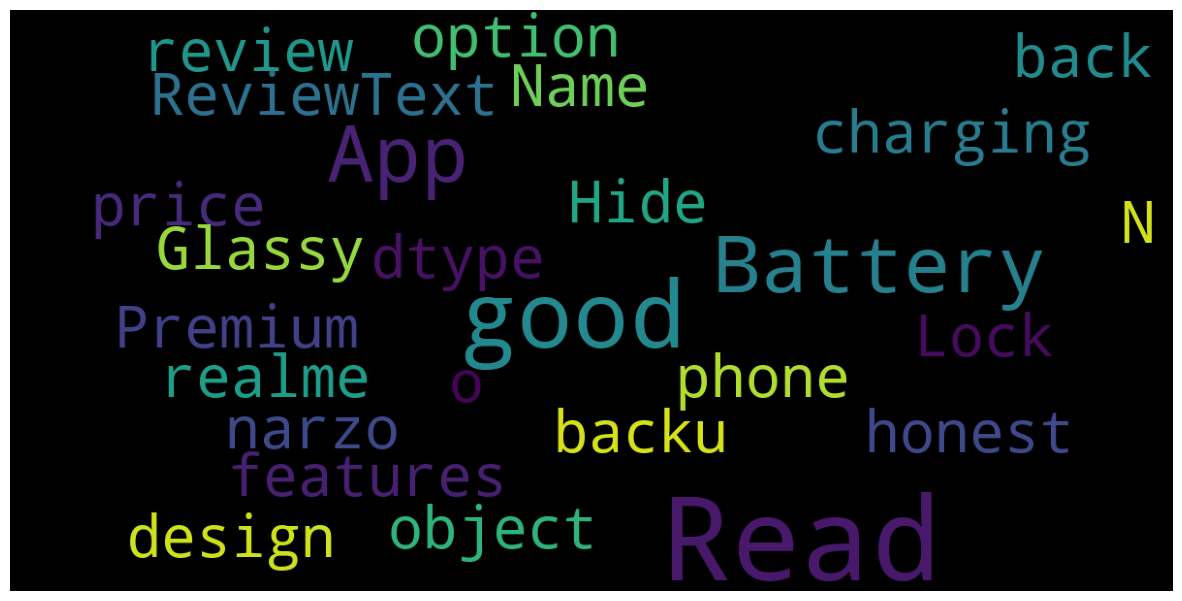

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [25]:
data.shape
data.dtypes
data.isnull().sum()

data = data.dropna(subset=['ReviewText'])

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(data['ReviewText'])
cnt_srs = data['ReviewText'].value_counts().head()
trace = go.Bar(
    y=cnt_srs.index[::-1],
    x=cnt_srs.values[::-1],
    orientation = 'h',
    marker=dict(
        color=cnt_srs.values[::-1],
        colorscale = 'Blues',
        reversescale = True
    ),
)
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import seaborn as sns

from IPython.display import HTML
cat_hist = data.groupby('categories',as_index=False).count()
HTML(pd.DataFrame(cat_hist['categories']).to_html())
import nltk 
from nltk import word_tokenize
from nltk.corpus import stopwords
import re
import string
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
def removePunctuation(x):
    x = x.lower()
    x = re.sub(r'[^\x00-\x7f]',r' ',x)
    return re.sub("["+string.punctuation+"]", " ", x)

stops = set(stopwords.words("english"))
def removeStopwords(x):
    filtered_words = [word for word in x.split() if word not in stops]
    return " ".join(filtered_words)
def removeAmzString(x):
    return re.sub(r'[0-9]+ people found this helpful\. Was this review helpful to you Yes No', "", x)

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

reviews = [sent if type(sent)==str else "" for sent in data['reviews.title'].values]
reviews = [removeAmzString(sent) for sent in reviews]
#reviews = [removeStopwords(sent) for sent in reviews]
reviews = [removePunctuation(sent) for sent in reviews]

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=200,
                      max_font_size=40,random_state=42).generate(str(reviews))
plt.figure(figsize=(15,20))
ax1 = plt.subplot2grid((4, 2), (0, 0))
ax2 = plt.subplot2grid((4, 2), (1, 0))
ax3 = plt.subplot2grid((4, 2), (0, 1), rowspan=2)
ax4 = plt.subplot2grid((4, 2), (2, 0), colspan=2,rowspan=2)

rat_hist = data.groupby('reviews.rating',as_index=False).count()
sns.barplot(x=rat_hist['reviews.rating'].values,y=rat_hist['id'].values,ax=ax1)

cat_hist = cat_hist.sort_values(by='id')
sns.barplot(x=cat_hist['categories'].index,y=cat_hist['id'].values,ax=ax3)

hf_hist = data.groupby('reviews.numHelpful',as_index=False).count()[0:30]
sns.barplot(x=hf_hist['reviews.numHelpful'].values.astype(int),y=hf_hist['id'].values,ax=ax2)

ax1.set_title("Reviews Ratings",fontsize=16)
ax3.set_title("Categories",fontsize=16)
ax2.set_title("Helpful Feedback",fontsize=16)
ax4.set_title("Words Cloud",fontsize=16)
ax4.imshow(wordcloud)
ax4.axis('off')
plt.show()

def cleaning(s):
    s = str(s)
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    return s
data['reviews.text'] = [cleaning(s) for s in data['reviews.text']]
data['revies.title'] = [cleaning(s) for s in data['reviews.title']]
vectorizer = TfidfVectorizer(stop_words='english',use_idf=True)
model = vectorizer.fit_transform(data['reviews.text'].str.upper())
km = KMeans(n_clusters=5,init='k-means++',max_iter=200,n_init=1)

k=km.fit(model)
terms = vectorizer.get_feature_names()
order_centroids = km.cluster_centers_.argsort()[:,::-1]
for i in range(5):
    print("cluster of words %d:" %i)
    for ind in order_centroids[i,:10]:
        print(' %s' % terms[ind])
    print() 
cnt_srs = data['reviews.rating'].value_counts().head()
trace = go.Bar(
    y=cnt_srs.index[::-1],
    x=cnt_srs.values[::-1],
    orientation = 'h',
    marker=dict(
        color=cnt_srs.values[::-1],
        colorscale = 'Blues',
        reversescale = True
    ),
)

layout = dict(
    title='Ratings distribution',
    )
data1 = [trace]
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename="Ratings")

data['reviews_length']=data['Scrape.text'].apply(len)
sns.set(font_scale=2.0)

g = sns.FacetGrid(data,col='reviews.rating',size=5)
g.map(plt.hist,'reviews_length')
#fake reviews
data['reviews.didPurchase'].fillna("Review N/A",inplace=True)
plt.figure(figsize=(10,8))
ax=sns.countplot(data['reviews.didPurchase'])
ax.set_xlabel(xlabel="People's Reviews",fontsize=17)
ax.set_ylabel(ylabel='No. of Reviews',fontsize=17)
ax.axes.set_title('Genuine No. of Reviews',fontsize=17)

In [31]:
print(data.columns)

Index(['ReviewText'], dtype='object')


In [32]:


from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
data = data.dropna(subset=['ReviewText'])
data = data.dropna(subset=['ReviewText'])
all_text=data['reviews.text']
train_text=data['reviews.text']
y=data['reviews.rating']

#Using the N-Gram Tf-idf Vectorizer
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)
word_vectorizer.fit(all_text)
train_word_features = word_vectorizer.transform(train_text)
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=10000)
char_vectorizer.fit(all_text)
train_char_features = char_vectorizer.transform(train_text)

train_features = hstack([train_char_features, train_word_features])
#Random Forest Classifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_features, y,test_size=0.3,random_state=101)
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
preds=classifier.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(preds,y_test))
# XGBoost
import xgboost as xgb
xgb=xgb.XGBClassifier()
xgb.fit(X_train,y_train)
preds2=xgb.predict(X_test)
print(classification_report(preds2,y_test))

KeyError: 'reviews.text'